# DeepArk Supplemental Figure S8 Notebook
- This notebook reproduces supplemental figure S9 from the manuscript.
- Note that recalculating the test performance results for this figure requires processing the raw RNA-seq data from SRA, and predicting regulatory activity for a number of loci. This can be rather time intensive. As such, the notebook currently just reads the pre-calculated performances from file.

## Setup

In [1]:
# Stats etc.
import numpy
import pandas
import h5py

# Viz
import seaborn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cbook
import sklearn.metrics

# Configure pandas printing.
pandas.options.display.max_rows = 12

/data/home/ecofer/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load metadata

In [2]:
# Read in metadata.
feat_df = pandas.read_csv("../DeepArk/data/danio_rerio.tsv", sep="\t")
feat_df.drop(["test_auc_roc", "test_auc_prc"], axis=1, inplace=True)

# Ensure proper ordering.
with open("../train/distinct_features.danio_rerio.txt", "r") as read_file:
    cur_accessions = [x.strip() for x in read_file.readlines()]
feat_df.set_index("accession", inplace=True)
feat_df = feat_df.loc[cur_accessions, :]
feat_df = feat_df.reset_index()
print("Finished.")
display(feat_df)

Finished.


,accession,index,genome,assay_target_class,assay_target,biosample_type_class,biosample_type,treatment,mutation,n_positive_test_examples
0,DCD000395SQ,0,danRer11,Chromatin,ATAC-seq,whole organism,"whole organism, 1d post-fertilization, Prim-5 ...",None,None,9990
1,DCD000635SQ,1,danRer11,Histone,H3K27ac,whole organism,"whole organism, 6h post-fertilization, Shield ...",None,None,4654
2,DCD000637SQ,2,danRer11,Histone,H3K27ac,whole organism,"whole organism, 6h post-fertilization, Shield ...",None,None,3009
3,DCD000639SQ,3,danRer11,Histone,H3K4me3,whole organism,"whole organism, 1d post-fertilization, Prim-5 ...",None,None,3750
4,DCD000641SQ,4,danRer11,Histone,H3K4me3,whole organism,"whole organism, 12h post-fertilization, 5-9 so...",None,None,7965
...,...,...,...,...,...,...,...,...,...,...
60,DCD003161SQ,60,danRer11,Chromatin,ATAC-seq,whole organism,"whole organism, 3.7h post-fertilization, Oblon...",None,None,1177
61,DCD003173SQ,61,danRer11,Chromatin,ATAC-seq,whole organism,"whole organism, 1d post-fertilization, Prim-5 ...",None,"Tg(fli1a:egfp)y1, GFP-positive nuclei",2738
62,DCD003174SQ,62,danRer11,Chromatin,ATAC-seq,whole organism,"whole organism, 1d post-fertilization, Prim-5 ...",None,"Tg(fli1a:egfp)y1, GFP-negative nuclei",4669
63,DCD003175SQ,63,danRer11,Chromatin,ATAC-seq,whole organism,"whole organism, 1d post-fertilization, Prim-5 ...",None,"Tg(fli1a:egfp)y1, GFP-negative nuclei",3880


## Calculate performance
- If you have not re-created the predictions for the _O. latipes_ test set using the _D. rerio_ model for DeepArk, leave the following cell as is.
- If you have indeed re-run the predictions for the _O. latipes_ test set, then you should uncomment that portion of the following cell. You should also comment the portion that says to comment it. This is so the calculation uses your predictions and does not simply load the table of performances from file.

In [3]:
# Read in feature information.
df = pandas.read_csv("../interspecies_prediction/interspecies_info.csv", sep=",")


# # Uncomment this if you're not using your own predictions:
# df.drop(["auc_roc", "auc_prc"], axis=1, inplace=True)

# # Read in predictions
# h5 = h5py.File("../interspecies_prediction/outputs/oryLat2_prediction_predictions.h5", "r")
# preds_df = h5["data"][()]
# h5.close()
# preds_df = pandas.DataFrame(preds_df)
# preds_df.columns = feat_df["accession"].tolist()
    
# # Read in labels and feature names.
# h5 = h5py.File("../interspecies_prediction/data/oryLat2_prediction.labels.h5", "r")
# lbls_df = h5["data"][()]
# h5.close()
# lbls_df = pandas.DataFrame(lbls_df)
# feats = list()
# with open("../interspecies_prediction/distinct_features.txt") as read_file:
#     for line in read_file:
#         line = line.strip()
#         if line != "":
#             feats.append(line)
# lbls_df.columns = feats

# # Get pairs of accessions.
# accession_map = list(df[["accession", "accession (Danio rerio)"]].itertuples(name=None, index=False))

# # Calculate performance.
# rocs = list()
# prcs = list()
# for acc, dr_acc in accession_map:
#     y = lbls_df[acc].values
#     y_hat = preds_df[dr_acc].values
#     rocs.append(sklearn.metrics.roc_auc_score(y, y_hat))
#     prcs.append(sklearn.metrics.average_precision_score(y, y_hat))
# df["auc_roc"] = rocs
# df["auc_prc"] = prcs

print("Finished.")

Finished.


## Configure plot

In [6]:
def reset_plot_config():
    seaborn.set()
    matplotlib.rcParams.update(matplotlib.rcParamsDefault)

    d = {"lines.linewidth": 0.4,
        "axes.linewidth": 0.4,
        "ytick.major.width": 0.4,
        "ytick.minor.width": 0.4,
        "xtick.major.width": 0.4,
        "xtick.major.size": 3,
        "ytick.major.size": 3,
        "ytick.minor.size": 1.6,
        "xtick.major.pad": 1,
        "ytick.major.pad": 1}

    for k, v in d.items():
        matplotlib.rcParams[k] = v

    matplotlib.rcParams["figure.dpi"] = 300
    matplotlib.rcParams["axes.facecolor"] = "none"
    matplotlib.rcParams["figure.facecolor"] = "none"
    matplotlib.rcParams["xtick.labelsize"] = 6
    matplotlib.rcParams["ytick.labelsize"] = 6
    matplotlib.rcParams["axes.labelsize"] = 6
    matplotlib.rcParams['axes.titlesize'] = 6
    matplotlib.rcParams['legend.fontsize'] = 6
    matplotlib.rcParams['axes.titlepad'] = 4
    matplotlib.rcParams['axes.ymargin'] = 0
    matplotlib.rcParams['axes.xmargin'] = 0
    for x in ["left", "right", "top", "bottom"]:
        matplotlib.rcParams["figure.subplot.{}".format(x)] = 0.08 if x in {"left",  "bottom"} else 0.99

    matplotlib.rcParams["legend.fancybox"] = False

    # Custome legend settings:    
    d = {"legend.borderpad" : 0.4,  
        "legend.labelspacing" : 0.0,  
        "legend.handlelength" : 2.0,  
        "legend.handleheight" : 0.7,
        "legend.handletextpad" : 0.,
        "legend.borderaxespad" : 0.4,
        "legend.fontsize": 6,
        "legend.borderpad": 0.4}

    #legend.columnspacing}
    for k, v in d.items():
        matplotlib.rcParams[k] = v

reset_plot_config()

## Plot results

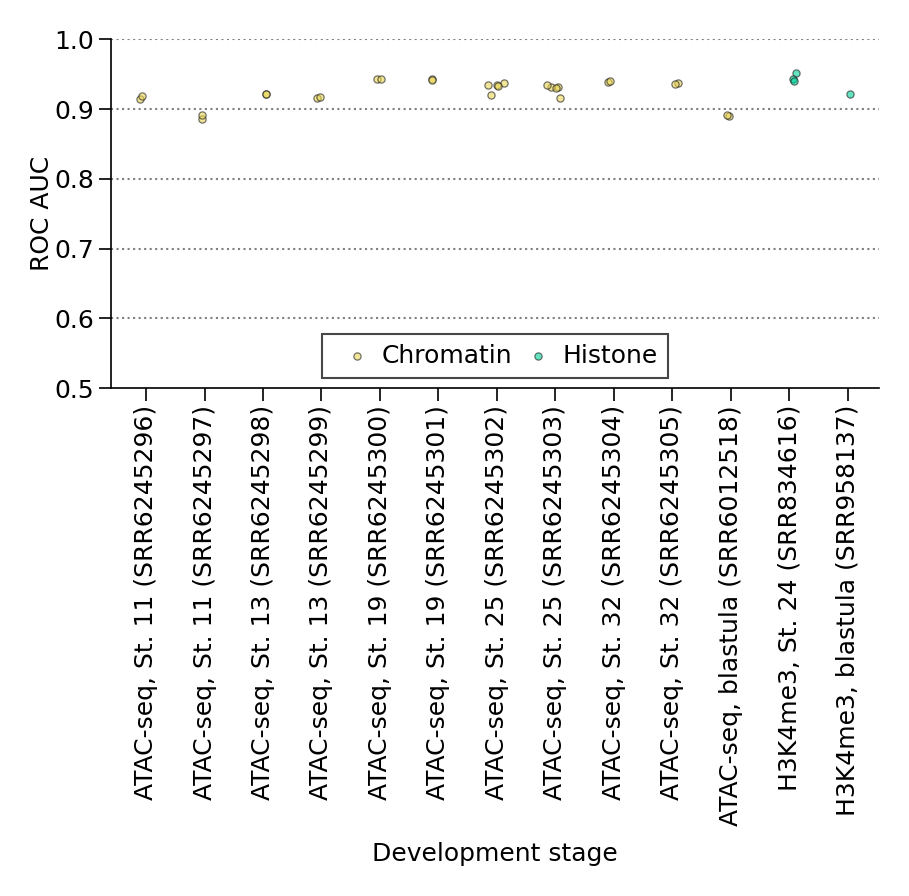

In [7]:
palette = ["#e9d556", "#00d198","#56b4e9","#e9566b"]
col_width = 0.3

# Config plot.
fig, ax = plt.subplots(1, 1, figsize=((7./2.54)*1.5, (7./2.54)/(1.61803398875*2.)*1.5), dpi=300, facecolor='none', edgecolor='k')#, space=0.5)

# Get strings to format.
tmp = list()
for i in range(df.shape[0]):
    tmp.append((df.accession.iloc[i],
                "{}, {} ({})".format(df.assay_target.iloc[i],
                                    df.biosample_type.iloc[i],
                                    df.accession.iloc[i])))
tmp = pandas.DataFrame(tmp, columns=["accession", "display_str"]).sort_values("display_str")
tmp = tmp.drop_duplicates()
tmp["x"] = numpy.arange(tmp.shape[0])

# Merge.
plt_df = df.merge(tmp, on="accession")
plt_df = plt_df.sort_values("display_str")

# Plot for each factor.
fnd_xtl = set()
xs = ["Chromatin", "Histone", "RNA polymerase", "TFs and others"]
for i, x in enumerate(xs):
    tmp = plt_df.copy()
    tmp = tmp[tmp.assay_target_class == x]
    if tmp.shape[0] == 0:
        continue
    xvals = tmp["x"].values
    xvals = xvals + (numpy.random.uniform(size=xvals.shape[0]) - 0.5) * col_width
    ax.scatter(xvals, tmp.auc_roc.values,
               color=palette[i],
               edgecolor='k',
               alpha=0.6,
               linewidth=0.3,
               s=3,
               zorder=0, label=x)
    fnd_xtl |= set(tmp.display_str.tolist())

# Handle axes.
ax.set_xlim(ax.get_xlim()[0] - 0.5, ax.get_xlim()[1] + 0.5)
ax.set_ylim(0.5, 1)
ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax.set_yticklabels([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
for y in numpy.arange(11) * 0.1:
    if y > ax.get_ylim()[0]:
        ax.axhline(xmin=0, xmax=3, y=y, linestyle=':', color="grey", linewidth=0.5, zorder=-1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel("ROC AUC", labelpad=0)
xtl = sorted(set(plt_df["display_str"].tolist()) & fnd_xtl)
ax.set_xticks(numpy.arange(len(xtl)))
ax.set_xticklabels(xtl, rotation=90)
plt.subplots_adjust(hspace=0.5)

# Add legend.
plt.subplots_adjust(right=0.7)#bottom=0.1, right=0.8, top=0.9)
#     legend = ax.legend(bbox_to_anchor=(1., 0.5), columnspacing=0, loc="lower center", ncol=4, frameon=True)
legend = ax.legend(columnspacing=0, loc="lower center", ncol=4, frameon=True)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_edgecolor("k")

plt.xlabel("Development stage")
plt.show()